To start, we need to determine the rating of each player using the following equation:

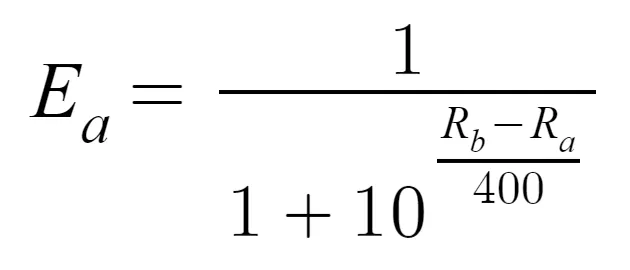

E is the probability of a player winning
R is the rating of a player
the subscripts denote the player in question

NOTE: this equation only accounts for two players at a time

In [53]:
def get_win_prob(ratingA: int, ratingB: int):
    return 1/(1 + 10**((ratingB - ratingA)/400))

In [46]:
get_win_prob(1000, 1000)

0.5

In [51]:
get_win_prob(1010, 1000)

0.5143871841659987

In [52]:
get_win_prob(1100, 1125)

0.4640840730548977

In [50]:
get_win_prob(1100, 1000)

0.6400649998028851

In [49]:
get_win_prob(1000, 1100)

0.35993500019711494

In [47]:
get_win_prob(2000, 1000)

0.9968476908167399

In [48]:
get_win_prob(1000, 2000)

0.0031523091832602115

Testing the win probability equation shows expected results. When the rating is the same the expected win probability is 50%. It remains near 50% when the ratings are reasonably close. When comparing players with a great the skill disparity, as representated by a large difference in rating, the higher rated player is almost expected to win. We can see this similarly with players who have a moderate skill disparity, although the win probability of the lower rated player is much higher in this case as their skill rating is sginifficantly closer.

Now, to calculate the a player's rating after a match we will use the following equation:

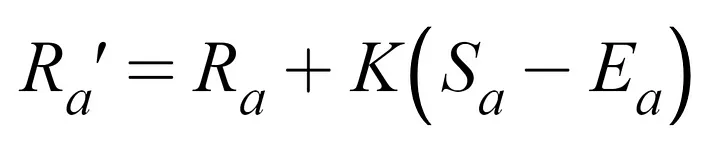

where R' represents the new rating, S represented the actual outcome (either 1 for a win or 0 for a loss) and K is a constant used to control the sensitivity of the update. If the K value is set too low then the change in rating will not be responsive enough. If the K value is too large however, then the change will be too sensitive. We will set our K value to 20, so that the average change to a player's rating is 10.

In [62]:
def get_new_rating(rating: int, win_loss: int, expected_win_loss: float):
    k = 20
    return rating + k*(win_loss - expected_win_loss)

In [63]:
get_new_rating(1000, 1, get_win_prob(1000, 1000))

1010.0

In [64]:
get_new_rating(1000, 0, get_win_prob(1000, 1000))

990.0

In [65]:
get_new_rating(1000, 1, get_win_prob(1000, 1025))

1010.718318538902

In [66]:
get_new_rating(1000, 0, get_win_prob(1000, 1025))

990.718318538902

In [67]:
get_new_rating(1000, 1, get_win_prob(1000, 1100))

1012.8012999960577

In [68]:
get_new_rating(1000, 0, get_win_prob(1000, 1100))

992.8012999960577

The change in elo is working as expected, however, ratings should be represented as integers. We can typecast the new rating to an integer but that will bring the gains and losses too close. The change in cases where the users are closely rated will reflect as though they had the same rating. This is fine as closely rated players can be considered to be in the same skill bracket.

In [72]:
def get_new_rating(rating: int, win_loss: int, expected_win_loss: float) -> int:
    k = 20
    return int(rating + k*(win_loss - expected_win_loss))

In [73]:
get_new_rating(1000, 1, get_win_prob(1000, 1000))

1010

In [74]:
get_new_rating(1000, 0, get_win_prob(1000, 1000))

990

In [75]:
get_new_rating(1000, 1, get_win_prob(1000, 1025))

1010

In [76]:
get_new_rating(1000, 0, get_win_prob(1000, 1025))

990

In [77]:
get_new_rating(1000, 1, get_win_prob(1000, 1100))

1012

In [78]:
get_new_rating(1000, 0, get_win_prob(1000, 1100))

992